### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from neuropy import plotting
from neuropy.utils import signal_process
from scipy.ndimage import gaussian_filter1d
from neuropy.plotting import plot_signal_heatmap
from neuropy.utils.mathutil import min_max_scaler
from neuropy.utils.signal_process import FourierSg
from hfuncs import whiten_signal
from scipy import stats
import subjects
import pandas as pd

sess = subjects.nsd.ratVday3[0]

### View optitrack TTL with nframes

In [4]:
rec_datetime = pd.read_csv(sess.filePrefix.with_suffix('.datetime.csv'))
nframes = np.cumsum(rec_datetime.nFrames.values)
nt = np.insert(nframes/30000,0,0)
opti_signal = sess.eegfile.get_signal(258)
time =opti_signal.time
opti_ttl = np.where((min_max_scaler(opti_signal.traces[0]))>0.5,1,0)
opti_diff = np.diff(np.insert(opti_ttl,0,0))
opti_start = time[opti_diff==1]
opti_stop = time[opti_diff==-1]

# _,ax = plt.subplots()
# ax.plot(opti_signal.time,opti_ttl)
# ax.vlines(nt,0,1)


In [8]:
opti_start-nt[:-1]

array([5.8208001 , 2.86011095, 3.96761775, 2.64736916, 1.5383245 ,
       1.62767427, 3.47382286, 2.18916056, 2.50768702, 2.79169297])

### View TTL

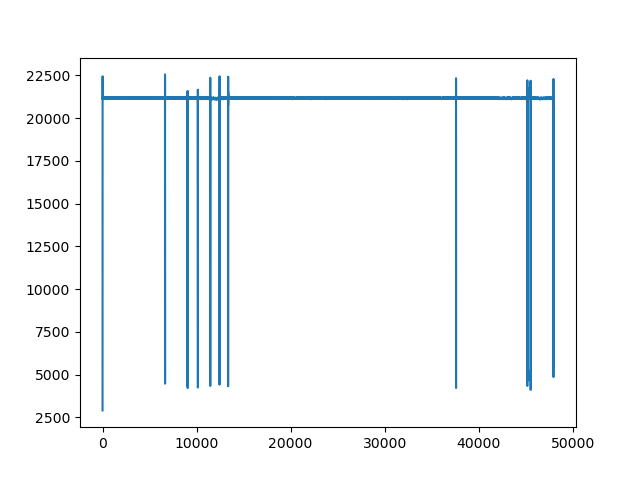

In [2]:
_,ax = plt.subplots()

ttl_sig = sess.eegfile.get_signal(258)
ax.plot(ttl_sig.time,ttl_sig.traces[0])

### View spectrogram (whitened or regular)

In [37]:
maze = sess.paradigm['re-maze'].flatten()
t1,t2 = maze[0]-3600-1800,maze[1]

signal = sess.eegfile.get_signal(1,t1,t2)
signal = whiten_signal(signal)
opti_signal = sess.eegfile.get_signal(257,t1,t2)
opti_ttl = min_max_scaler(opti_signal.traces[0])*100
spect = FourierSg(signal,window=0.2,overlap=0.1)

position = sess.maze

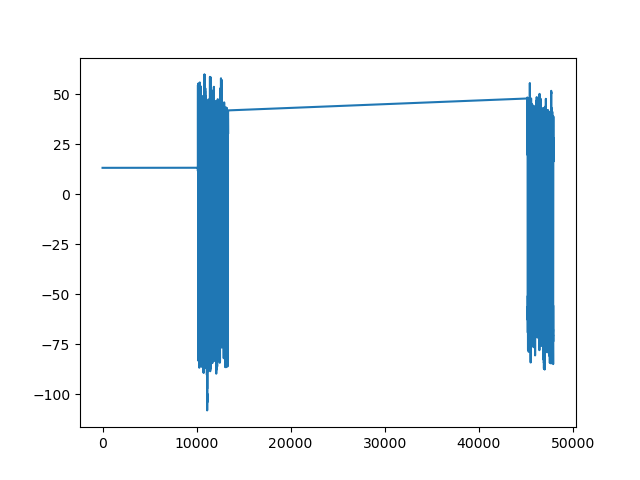

In [40]:
_,ax = plt.subplots()
ax.plot(sess.position.time,sess.position.x)

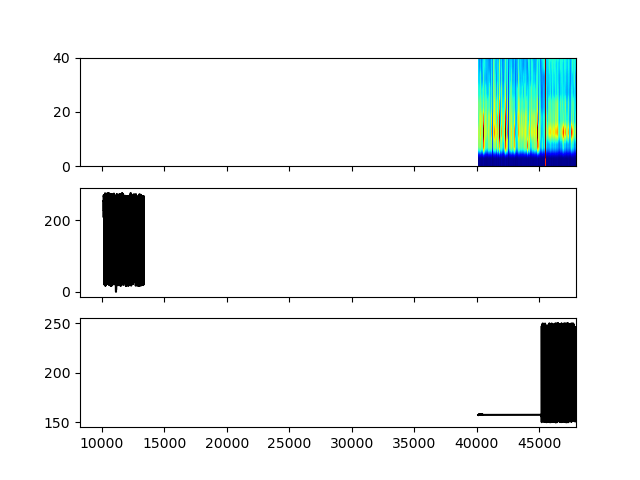

In [39]:

_, axs = plt.subplots(3,1,sharex=True)

ax = axs[0]
ax.imshow(
    spect.traces,
    aspect="auto",
    vmax=0.004,
    cmap="jet",
    origin="lower",
    extent=[spect.time[0], spect.time[-1], spect.freqs[0], spect.freqs[-1]],
)

ax.axvline(168*60+58,color='w',ls='--')
ax.axvline(207*60+17,color='w',ls='--')
ax.set_ylim(0,40)
ax=axs[1]
ax.plot(position.time,position.x,color='k')

ax=axs[2]
ax.plot(opti_signal.time,opti_ttl+150,color='k')



In [ ]:
_,ax = plt.subplots()

ax.plot(spect.theta)

In [ ]:
%matplotlib widget
from neuropy.plotting import plot_signal_heatmap
import matplotlib.pyplot as plt

_, ax = plt.subplots()
ax.imshow(
    spect.traces,
    aspect="auto",
    vmax=0.004,
    cmap="jet",
    origin="lower",
    extent=[spect.time[0], spect.time[-1], spect.freqs[0], spect.freqs[-1]],
)
